In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.optimize as opt
%load_ext autoreload

layer_size = 400 # 20x20 pixels
num_labels = 10 #0 - 9 digits

data = scipy.io.loadmat("ex3data1.mat")
x = data['X']
y = data['y']
zero = np.argwhere(y==10)
y[zero] = 0
m = x.shape[0]
print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(y.shape))
print("m = {}".format(m))

x.shape = (5000, 400)
y.shape = (5000, 1)
m = 5000


In [2]:
rand_indexes = np.random.randint(0, 5000, 100)
rand_X = x[rand_indexes, :]
print(rand_X.shape)

(100, 400)


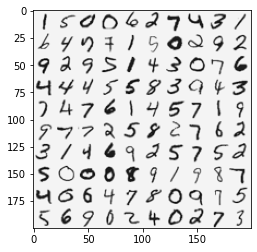

In [3]:
%autoreload 2
from nnfunctions import displayData
def checkNNgradients(lam):
    i_layer_size = 3
    h_layer_size = 5
    num_labels = 3
    m = 5

    theta1 = debugInitializeWeights(h_layer_size, i_layer_size)
    theta2 = debugInitializeWeights(num_labels, h_layer_size)

    X = debugInitializeWeights(m, i_layer_size - 1)
    y = np.mod(range(m), num_labels)
    y = np.reshape(y, (y.shape[0], 1))
    print(y.shape)

    nn_params = np.hstack((np.reshape(theta1, theta1.size),
                           np.reshape(theta2, theta2.size)))
    
    grad = nnGrad(nn_params, i_layer_size, h_layer_size, num_labels, X, y, lam)
    numgrad = computeNumericalGradient(nnCostFunction, nn_params)

    fmt = '{:25}{}'
    print(fmt.format('Numerical Gradient', 'Analytical Gradient'))
    for numerical, analytical in zip(numgrad, grad):
        print(fmt.format(numerical, analytical))

    print('The above two columns you get should be very similat. \n'\
          'Left Col.: Youe Numerical Gradient, Right>Col.:Analytical Gradient) ')

    diff = Decimal(np.linalg.norm(numgrad-grad))/Decimal(np.linalg.norm(numgrad+grad))
    print('If your backpropagation implementation is correct, then\n' \
          'the relative difference will be small (less than 1e-9)\n ' \
          '\nRelative Difference: {.10E}'.format(diff))


displayData(rand_X)

In [4]:
learned_theta_data = scipy.io.loadmat("ex3weights.mat")
learned_theta_data
learned_theta_1 = learned_theta_data['Theta1']
learned_theta_2 = learned_theta_data['Theta2']
print("learned theta 1 shape = {}".format(learned_theta_1.shape))
print("learned theta 2 shape = {}".format(learned_theta_2.shape))

learned theta 1 shape = (25, 401)
learned theta 2 shape = (10, 26)


In [5]:
nn_params = np.hstack((np.reshape(learned_theta_1, learned_theta_1.size),
                       np.reshape(learned_theta_2, learned_theta_2.size)))
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
lam = 1
print("nn_params shape = {}".format(nn_params.shape))

nn_params shape = (10285,)


In [6]:
from nnfunctions import unrollThetas

t1, t2 = unrollThetas(nn_params, input_layer_size, hidden_layer_size, num_labels)

In [7]:
from nnfunctions import nnCostFunction

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, x, y, lam)

In [8]:
from nnfunctions import nnGrad

grad = nnGrad(nn_params, input_layer_size, hidden_layer_size, num_labels, x, y, lam)

In [9]:
from nnfunctions import randInitializeWeights

initial_theta_1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_theta_2 = randInitializeWeights(hidden_layer_size, num_labels)

initial_nn_params = np.hstack((np.reshape(initial_theta_1, initial_theta_1.size),np.reshape(initial_theta_2, initial_theta_2.size)))

In [10]:
from nnfunctions import checkNNgradients

checkNNgradients(lam)

Numerical Gradient        Analytical Gradient
     0.006906540832574137 0.006906540840162157
     0.016718566988593864 0.01671856698643929
     0.018329800373084737 0.018329800370677628
    0.0030886998292345424 0.0030886998263203198
     0.012125104256188735 0.01212510426975958
    -0.019221467693064653 -0.019221467695018774
    -0.005436643775169614 -0.00543664377671845
     0.013346605354236374 0.013346605357529474
     0.006198479012287095 0.006198479017045424
      0.00830655697559024 0.008306556970585731
    -0.010860120995825895 -0.0108601209943238
    -0.020042053803237536 -0.020042053801066016
    -0.005423556830308485 -0.005423556834022437
     0.008515890452809316 0.008515890454365797
     0.019682128640230445 0.019682128638418325
     0.012752708520302747 0.012752708521095744
    -0.012076102853253445 -0.012076102864730183
     -0.01917074978097233 -0.019170749780494364
    -0.015180245294121875 -0.015180245291515466
    0.0027669067126367963 0.0027669067111948105
      0.1

In [11]:
results = opt.fmin_cg(nnCostFunction, x0=initial_nn_params, fprime=nnGrad, args=(input_layer_size,hidden_layer_size,num_labels,x,y,lam))

Optimization terminated successfully.
         Current function value: 0.302846
         Iterations: 3087
         Function evaluations: 7174
         Gradient evaluations: 7174


In [12]:
learned_theta_1, learned_theta_2 = unrollThetas(results, input_layer_size, hidden_layer_size, num_labels)

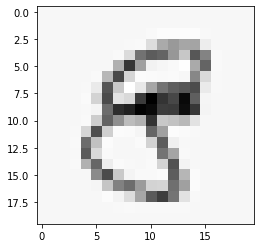

In [13]:
digit = np.array(x[4301,:])
digit = np.reshape(digit, (20,20)).T
plt.imshow(digit, cmap='Greys')


In [14]:
from nnfunctions import predict

predict(learned_theta_1, learned_theta_2, digit)

8